<h1>Proiect: Tabelare și data visualizatio

Student: Guliciuc George Gabriel

Grupa: mDM11

Context:

    Este deja cunoscut că mărimea și zona în care se află  influnteaza prețul unui apartament, prin acest proiect doresc să văd dacă există o relație între prețul apartamentul și alte specificații a acestuia (anul construcției, etajul la care se află apartamentul, înălțimea blocului, tipul de încălzirea, dacă are un loc de parcare/garaj) în zona metropolitană Iași.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Functionalitati import *

<h2>Prezentarea bazei de date inițiale</h2>

Pentru acest proiect am extras datele de la anuturile de vânzare din zona metropolitană Iași de pe situl https://www.storia.ro/ro/rezultate/vanzare/apartament/iasi. Folosind un proces de data scraping, algoritmul se afla in fisierul "DataScraping.py". Datele extrase au fost salvate in fisierul "apartamente_de_vanzare.xlsx".

Am ales să folosesc datele doar acest site deoarece majoritatea anunțurilor se repetau și pe celalalte situri.

In [2]:
vanzare_df = pd.read_excel("apartamente_de_vanzare.xlsx")
inchiriere_df = pd.read_excel("apartamente_de_inchiriat.xlsx")

Baza de date inițială conține mai multe coloane, majoritatea nu ne sunt utile pentru acest proiect și o să fie eliminate. De asemenea toate datele sunt de tipul "strîng/text"(Python o sa foloseaca tipul "object" pt string https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object ), mai putin coloana "Numărul de camere" care este "int/numar" 

In [3]:
vanzare_df.dtypes

Zona                       object
Pret                       object
Suprafață                  object
Forma de proprietate       object
Numărul de camere           int64
Stare                      object
Etaj                       object
Balcon/grădină/terasă      object
Chirie                     object
Garaj/loc de parcare       object
Vizionare la distanță      object
Încălzire                  object
Tip proprietate            object
Tip vânzător               object
Liber de la                object
Anul construcției          object
Tip clădire                object
Tip geamuri                object
Lift                       object
Media                      object
Siguranță                  object
Facilități                 object
Informații suplimentare    object
Material de construcție    object
Titlu                      object
Descriere                  object
dtype: object

<h3> Din baza inițială o să salvăm următoarele coloane:</h3>

- Zona: Specifică locul unde se afla blocul;

- Pret: Prețul apartamentului în euro (sunt câteva cazuri în care este în RON);

- Suprafață: Suprafață utilă în m²;

- Garaj/loc de parcare: Garaj/loc de parcare sau câmp gol

- Încălzire: Modul de încălzirea a apartamentului sau câmp gol

- Anul construcției: Anul în care lucrările au fost finalizate

<h3> Note: </h3> O să ne folosim și de coloana "Descriere" pentru a completă câmpurile goale. În multe anunțuri unde anumite câmpuri sunt goale( ex: "Etaj")informațiile care ar trebui să umple respectivele câmpuri se pot găsi în "Descriere".

<h2> Operațiuni preliminare </h2>
<h3> Note: </h3>
Pentru nu a încarcă acest fișier, funcțiile folosite au fost scrise în fișierul "Functionalitati.py".

<h3>Câmpurile goale:</h3>
În datele inițiale intrările goale sunt "umplute"  cu "Cere informații" și "fără informații", pentru a nu există 2 lucruri care de fapt reprezintă același lucru le-am înlocuit cu NaN

In [4]:
vanzare_df.replace("Cere informații", np.nan, inplace=True)
vanzare_df.replace("fără informații", np.nan, inplace=True)

In [5]:
inchiriere_df.replace("Cere informații", np.nan, inplace=True)
inchiriere_df.replace("fără informații", np.nan, inplace=True)

<h3> Coloana "Zona Oras": (Categoric) </h3>
Am creat o nouă coloana "Zona oraș" din coloana "Zona", o salvăm doar cartierul unde se găsește apartamentul(ex: Podu Roș, Copou), în timp ce în în coloana "Zona" se găsesc mai multe informații: cartier, localitate, județ ( în unele cazuri fiind și stradă) dar pentru că ne raportăm doar la zona metropolitană Iași nu avem nevoie de localitate și județ și am luat stradă că acesta nu se găsește la majoritatea datelor.

In [6]:
vanzare_df['Zona'].head(10)

0                                 Podu Ros, Iasi, Iasi
1                                    Dacia, Iasi, Iasi
2                             Podu de Fier, Iasi, Iasi
3                                Agronomie, Iasi, Iasi
4                    Soseaua Nicolina, CUG, Iasi, Iasi
5                  Strada Voinesti, Galata, Iasi, Iasi
6                                 Podu Ros, Iasi, Iasi
7      Strada Moara de Vant, Moara de Vant, Iasi, Iasi
8    Strada Sfantul Ioan, Zona Industriala, Iasi, Iasi
9              Bulevardul Tutora, Podu Ros, Iasi, Iasi
Name: Zona, dtype: object

In [7]:
vanzare_df['Zona Oras'] = vanzare_df['Zona'].apply(city_zone)
inchiriere_df['Zona Oras'] = inchiriere_df['Zona'].apply(city_zone)

In [8]:
vanzare_df['Zona Oras'].head(10)

0            Podu Ros
1               Dacia
2        Podu de Fier
3           Agronomie
4                 CUG
5              Galata
6            Podu Ros
7       Moara de Vant
8    Zona Industriala
9            Podu Ros
Name: Zona Oras, dtype: object

<h3> Coloana "Pret": (Numeric)</h3>

Această coloana conține valoarea apartamentului în euro, în baza de date originală prețul este un strîng, că să îl putem transformă în valoare numerică vom fi nevoiți să:

- să eliminăm caracterul "€"

- să eliminăm spațiile

Valorile sunt în intervalul închis [4634, 1192500]

În cazul prețurilor în "RON" ele o să fie convertite în euro, am folosit rată de schimb 5 RON = 1 Euro

In [9]:
vanzare_df['Pret'].head()

0    168 000 €
1    128 000 €
2    396 000 €
3    102 405 €
4    120 000 €
Name: Pret, dtype: object

In [10]:
vanzare_df['Pret'] = vanzare_df['Pret'].apply(convert_money)
inchiriere_df['Pret'] = inchiriere_df['Pret'].apply(convert_money)

In [11]:
vanzare_df['Pret'].head()

0    168000
1    128000
2    396000
3    102405
4    120000
Name: Pret, dtype: int64

<h3> Coloana "Suprafață":(Numeric)</h3>

Această coloana conține suprafață apartamentului exprimată în m², în baza de dată originală  suprafață este un strîng, că să îl putem transformă în valoare numerică vom nevoiți să:

- să eliminăm caracterul "m²"

- să eliminăm spațiile
- să schimbăm caracterul "," cu "."

Valorile sunt în intervalul închis [10, 506]

In [12]:
vanzare_df['Suprafață'].head()

0    66,18 m²
1       81 m²
2      230 m²
3    68,27 m²
4       78 m²
Name: Suprafață, dtype: object

In [13]:
vanzare_df['Suprafață'] = vanzare_df['Suprafață'].apply(convert_area)
inchiriere_df['Suprafață'] = inchiriere_df['Suprafață'].apply(convert_area)

In [14]:
vanzare_df['Suprafață'].head()

0     66.18
1     81.00
2    230.00
3     68.27
4     78.00
Name: Suprafață, dtype: float64

<h3> Coloana "Numarul de camere":(Categoric) </h3>
Această coloana conține numărul de camere în care este compartimentat apartamentul.
Această coloana nu a suferit modificări.
Valorile posibile sunt în mulțimea {1, 2, 3 ,4, 5, 9}.

In [15]:
vanzare_df['Numărul de camere'].unique()

array([2, 3, 5, 1, 4, 9], dtype=int64)

<h3> Coloana "Anul construcției": (Numeric) </h3>

Această coloana ne oferă informații despre anul în care blocul a fost finalizat, coloana conține și spații goale, în primult rând completăm( unde se poate) cu informațiile din coloana "Descriere"( prin parsarea textului). Chiar și așa o rămas câmpuri goale, pentru a le umple am procedeat astfel:

- Am creat o nouă coloana "Zona Oraș" care cuprinde zonele principale identificate din zona metropolitană Iași(prin parsarea textului din coloana "Zona";

- Cum majoritatea clădirilor dintr-o zona  sunt construite în același interval de timp am luat din nou mode;

Valori posibile: {2015, 1989, 2001, 2023, 2022, 1970, 2026, 2018, 1997, 2008, 1990, 2017, 2021, 2019, 1972, 1965, 2025, 2024, 1980, 1978, 2020, 1979, 2016, 1986, 1968, 2010, 1977,
1985, 1992, 1976, 1973, 1974, 1984, 1975, 1967, 1964, 1988, 1983, 1987, 1981, 1966, 2009, 2014, 1971, 1995, 1969, 1962, 1982, 2005, 1955, 2011, 1960, 2013, 2012, 1993, 1963, 1958,
1996, 1959, 2000, 1954, 1991, 1890, 1998, 1999, 1994, 1952, 1950, 1961, 2006}

In [16]:
vanzare_df["Anul construcției"] = vanzare_df.apply(lambda df: get_year(df["Anul construcției"], df["Descriere"]), axis=1)
inchiriere_df["Anul construcției"] = inchiriere_df.apply(lambda df: get_year(df["Anul construcției"], df["Descriere"]), axis=1)

In [17]:
vanzare_df["Anul construcției"] = vanzare_df.apply(lambda df:
                                                   year_mode(df['Zona Oras'], df["Anul construcției"], vanzare_df), axis=1)
inchiriere_df["Anul construcției"] = inchiriere_df.apply(lambda df: 
                                                         year_mode(df['Zona Oras'], df["Anul construcției"], inchiriere_df),
                                                         axis=1)

In [18]:
vanzare_df['Anul construcției'].replace(np.nan, 0, inplace=True)
vanzare_df['Anul construcției'] = vanzare_df['Anul construcției'].astype('int')
index_to_drop = vanzare_df.index[vanzare_df['Anul construcției'] ==0].to_list()
vanzare_df.drop(index_to_drop, inplace=True)
inchiriere_df["Anul construcției"].replace(np.nan, 0, inplace=True)
inchiriere_df["Anul construcției"] = inchiriere_df["Anul construcției"].astype("int")

<h3> Coloana "Etaj":</h3>
Această coloana conține și spații goale, în primult rând completăm( unde se poate) cu informațiile din coloana "Descriere"( prin parsarea textului). De asemenea în această coloana sunt trecute și etajul apartamentului cât și numărul de etaje ale blocului, de aceea o să creem două coloane noi(Ele pot fi considerate atât numerice cât și categorice, în funcție de ce dorim să facem cu ele):

- 'Etaj apartament': Care o să conțină etajul la care se află apartamenul;

Valori posibile : {'4', '8', '3', '2', '6', '1', '7', 'parter', '5', '9', 'mansardă', '10', 'demisol'}

-  'Număr Etaj Bloc': Care o să conțină numărul de etaje ale blocului;

Valori posibile : {4,  9,  3,  2, 10,  1,  7,  8,  0,  5, 12,  6, 11, 18, 13, 15, 16}



În anumite cazuri se specifică doar etajul apartamentului, pentru a obține o aproximare a câte nivele are blocul am procedat astfel:

- în cazul în care apartamentul este la demisol sau parter am presupus că apartamentul are doar parter;

- în cazul în care apartamentul este la mansardă am luat mode;

- în rest am luat etajul la care se află apartamentul că fiind ultimul;

Note: Am eliminat apartamentele care nu au nici o informație legată de etaj, de asemenea am eliminat și o intrare greșită.


In [19]:
vanzare_df['Etaj'].head(10)

0      4
1      8
2    3/2
3      2
4      6
5      1
6    NaN
7      2
8      7
9      2
Name: Etaj, dtype: object

In [20]:
vanzare_df['Etaj'] = vanzare_df.apply(lambda df: building_floors(df["Etaj"], df["Descriere"]), axis=1)
inchiriere_df['Etaj'] = inchiriere_df.apply(lambda df: building_floors(df["Etaj"], df["Descriere"]), axis=1)

In [21]:
vanzare_df['Etaj apartament'] = vanzare_df['Etaj'].apply(apartment_floor)
inchiriere_df['Etaj apartament'] = inchiriere_df['Etaj'].apply(apartment_floor)

In [22]:
vanzare_df['Numar Etaj Bloc'] = vanzare_df['Etaj'].apply(number_of_floors)
inchiriere_df['Numar Etaj Bloc'] = inchiriere_df['Etaj'].apply(number_of_floors)

In [23]:
vanzare_df['Numar Etaj Bloc'].replace(np.nan, 0, inplace=True)
index_to_drop = vanzare_df.index[vanzare_df['Numar Etaj Bloc'] == "24"].to_list()
vanzare_df.drop(index_to_drop, inplace=True)

In [24]:
inchiriere_df['Numar Etaj Bloc'].replace(np.nan, 0, inplace=True)
index_to_drop = inchiriere_df.index[inchiriere_df['Numar Etaj Bloc'] == "24"].to_list()
inchiriere_df.drop(index_to_drop, inplace=True)

In [25]:
vanzare_df['Etaj apartament'].replace(np.nan, 0, inplace=True)
index_to_drop = vanzare_df[vanzare_df['Etaj apartament'] == 0].index
vanzare_df.drop(index_to_drop, inplace=True)

In [26]:
inchiriere_df['Etaj apartament'].replace(np.nan, 0, inplace=True)
index_to_drop = inchiriere_df[inchiriere_df['Etaj apartament'] == 0].index
inchiriere_df.drop(index_to_drop, inplace=True)

In [27]:
mode_mansarda = int(vanzare_df[vanzare_df['Etaj apartament'] == 'mansardă']['Numar Etaj Bloc'].mode().to_list()[0])
vanzare_df['Numar Etaj Bloc'] = vanzare_df.apply(lambda df: 
                                                 set_max_floor(df['Etaj apartament'], df['Numar Etaj Bloc'], mode_mansarda),
                                                 axis=1)

In [28]:
mode_mansarda = int(inchiriere_df[inchiriere_df['Etaj apartament'] == 'mansardă']['Numar Etaj Bloc'].mode().to_list()[0])
inchiriere_df['Numar Etaj Bloc'] = inchiriere_df.apply(lambda df: 
                                                       set_max_floor(df['Etaj apartament'], df['Numar Etaj Bloc'], mode_mansarda),
                                                       axis=1)

In [29]:
vanzare_df['Numar Etaj Bloc'] = vanzare_df['Numar Etaj Bloc'].astype('int')

In [30]:
vanzare_df[['Etaj apartament', 'Numar Etaj Bloc']].head(10)

,Etaj apartament,Numar Etaj Bloc
0,4,4
1,8,9
2,3,3
3,2,2
4,6,10
5,1,1
7,2,2
8,7,7
9,2,8
10,2,4


<h3> Coloana "Garaj/loc de parcare": (Categoric)</h3>

Această coloana ne oferă informații dacă avem un loc de parcare( chiar dacă el se cumpără separat), coloana conține și spații goale, în primult rând completăm( unde se poate) cu informațiile din coloana "Descriere"( prin parsarea textului). Pentru intrările care nu s-a putut idenficia loc de parcare sau garaj, am presupus că nu au și am completat cu "Fără loc".

Valorile posibile: {"Fără loc", "loc de parcare", "garaj"}

In [31]:
vanzare_df['Garaj/loc de parcare'] = vanzare_df.apply(lambda df: parcare_or_garaj(df['Garaj/loc de parcare'],
                                                                                  df["Descriere"]), axis=1)
inchiriere_df['Garaj/loc de parcare'] = inchiriere_df.apply(lambda df: parcare_or_garaj(df['Garaj/loc de parcare'],
                                                                                        df["Descriere"]), axis=1)

In [32]:
vanzare_df['Garaj/loc de parcare'].replace(np.nan, "Fara loc", inplace=True)
inchiriere_df['Garaj/loc de parcare'].replace(np.nan, "Fara loc", inplace=True)

<h3>Coloana "Încălzire": (Categoric)</h3>

Această coloana ne oferă informații despre metodă de încălzirea a apartamentului, coloana conține și spații goale, în primult rând completăm( unde se poate) cu informațiile din coloana "Descriere"( prin parsarea textului). Pentru intrările care nu s-a putut idenficia sursă de încălzire completat cu "nespecificat"

Valori posibile: {"centralizată", "centrală pe gaz", "nespecificat", "centrală", "centrală electrică", "altul"}

In [33]:
vanzare_df["Încălzire"].replace(np.nan, "nespecificat", inplace=True)

In [34]:
vanzare_df["Încălzire"] = vanzare_df.apply(lambda df: heating_system(df["Încălzire"], df["Descriere"]), axis=1)

<h3>Coloana "Cutremur":(Categoric)</h3>

Această este o coloana creată de mine, ne ofera informatii daca blocul ar rezista la un cutremur care a fost completată după un raționament empiric. Astfel:

- 'Anul construcției' <= 1977 și 'Numar Etaj Bloc' > 5 -> "Cade";
- 'Anul construcției' <= 1977 sau 'Numar Etaj Bloc' > 5 -> "Te simti norocos?"
- altfel -> "Sigur"

In [35]:
vanzare_df['Cutremur'] = vanzare_df.apply(lambda df:
                                                  dangerous_building(df['Anul construcției'], df['Numar Etaj Bloc']), axis=1)
inchiriere_df['Cutremur'] = inchiriere_df.apply(lambda df:
                                                  dangerous_building(df['Anul construcției'], df['Numar Etaj Bloc']), axis=1)


<h2> Nouă baza de date. </h2>

In [36]:
new_vanzare_df = vanzare_df.loc[:,("Zona Oras", "Pret", 'Suprafață', 'Numărul de camere', 'Anul construcției',
                                   'Etaj apartament', 'Numar Etaj Bloc', 'Garaj/loc de parcare',"Încălzire", 'Cutremur')]
new_inchiriere_df = inchiriere_df.loc[:, ("Zona", "Pret", 'Suprafață', 'Numărul de camere', 'Anul construcției',
                                          'Etaj apartament', 'Numar Etaj Bloc', 'Garaj/loc de parcare',"Încălzire", 'Cutremur')]

In [37]:
new_vanzare_df.to_csv("new_apartamente_de_vanzare.csv")
new_vanzare_df.to_excel("new_apartamente_de_vanzare.xlsx")

In [38]:
new_vanzare_df['An rotunjit'] = new_vanzare_df['Anul construcției'].apply(round_years)

<h2> Analiză grafică </h2>

<h3> Împărțirea blocurilor după Cartier și numărul de etajue. </h3>

<Axes: xlabel='Zona Oras 2', ylabel='Numar Etaj Bloc'>

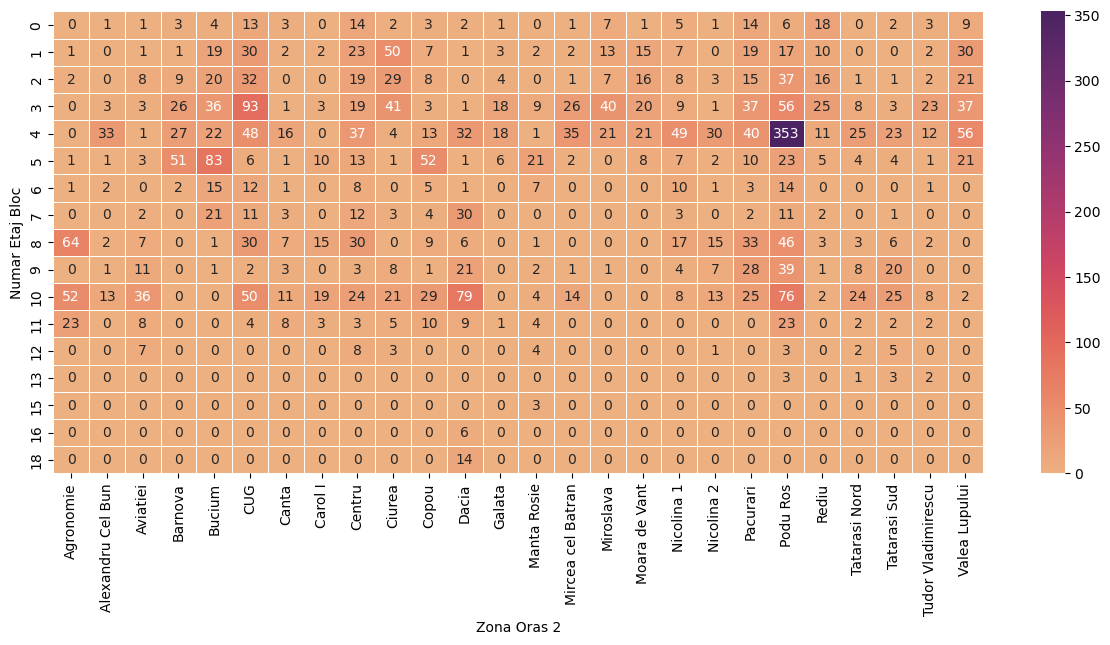

In [39]:
df = new_vanzare_df.groupby(['Zona Oras'], as_index=False)['Numar Etaj Bloc'].value_counts()
df['Zona Oras 2'] = df.apply(lambda dft: zona_oras_2(dft["Zona Oras"], df), axis=1)
df = df.drop('Zona Oras', axis=1)
index_to_drop = df.index[df["Zona Oras 2"]=="Alte Zone"].to_list()
df = df.drop(index_to_drop)
blocuri = (df.pivot(index="Numar Etaj Bloc", columns="Zona Oras 2", values="count"))
blocuri = blocuri.fillna(0)
blocuri = blocuri.astype('int')
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(blocuri, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="flare")

<h3>Împărțirea blocurilor după Cartier și numărul de etajue. </h3>

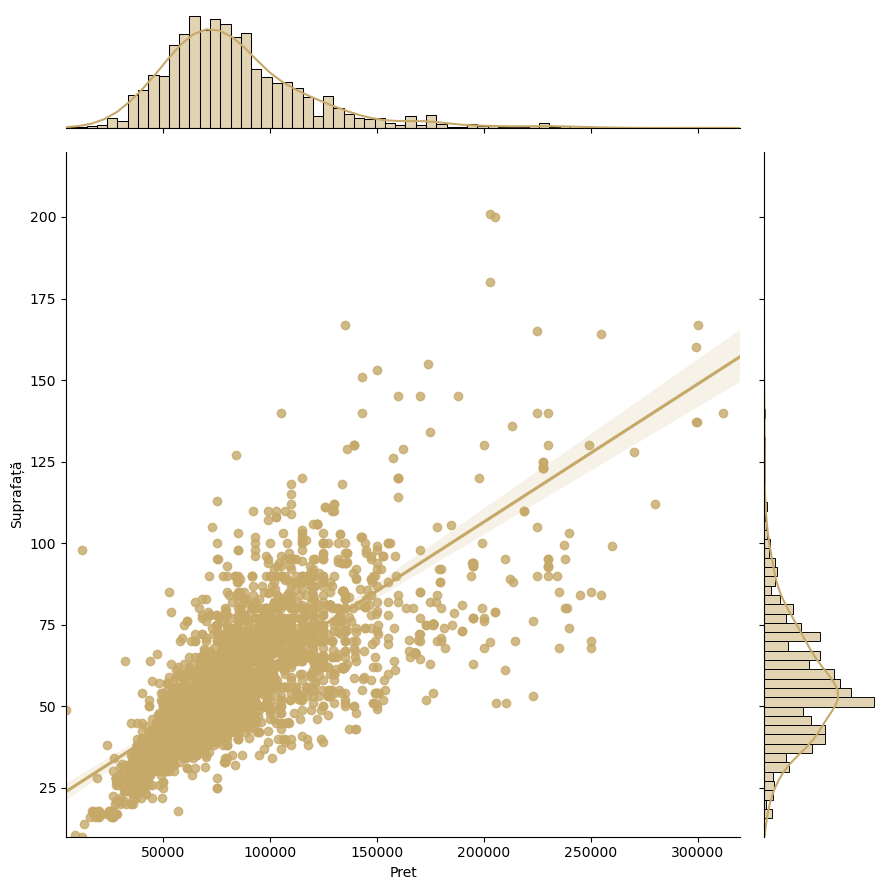

In [40]:
sns.jointplot(x='Pret', y='Suprafață',
              data=new_vanzare_df,
              kind='reg',
              color='#C6A969',
              height=9,
              ylim=(new_vanzare_df['Suprafață'].min(), 220),
              xlim=(new_vanzare_df['Pret'].min(),320000))

<h3>Împărțirea pe numărul de etaje bloc și anul construcției.</h3>

<Axes: xlabel='An rotunjit', ylabel='Numar Etaj Bloc'>

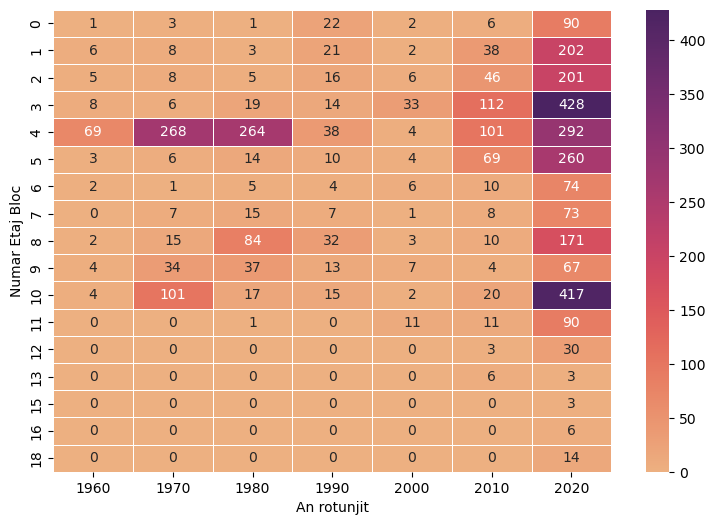

In [41]:
df = new_vanzare_df.groupby(['An rotunjit'], as_index=False)['Numar Etaj Bloc'].value_counts()
blocuri = (df.pivot(index="Numar Etaj Bloc", columns="An rotunjit", values="count"))
blocuri = blocuri.fillna(0)
blocuri = blocuri.astype('int')
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(blocuri, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="flare")

<Axes: xlabel='Numărul de camere', ylabel='Numar Etaj Bloc'>

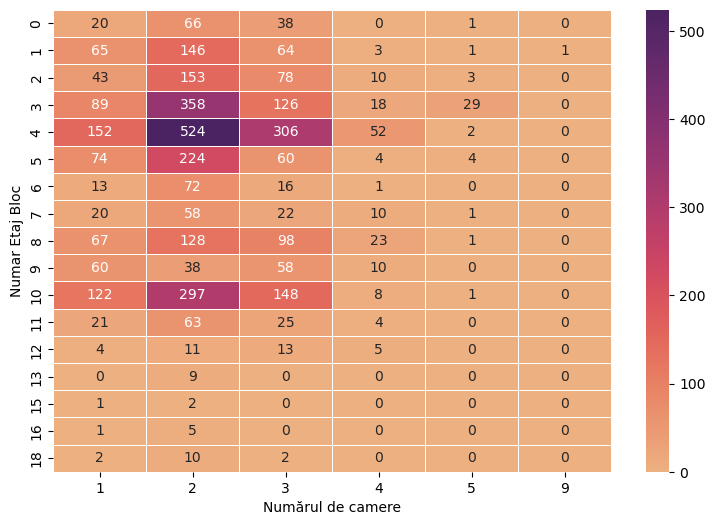

In [42]:
df = new_vanzare_df.groupby(['Numărul de camere'], as_index=False)['Numar Etaj Bloc'].value_counts()
apartamente = df.pivot(index='Numar Etaj Bloc', columns='Numărul de camere', values="count")
apartamente = apartamente.fillna(0)
apartamente = apartamente.astype('int')
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(apartamente, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="flare")

<Axes: xlabel='Count', ylabel='An rotunjit'>

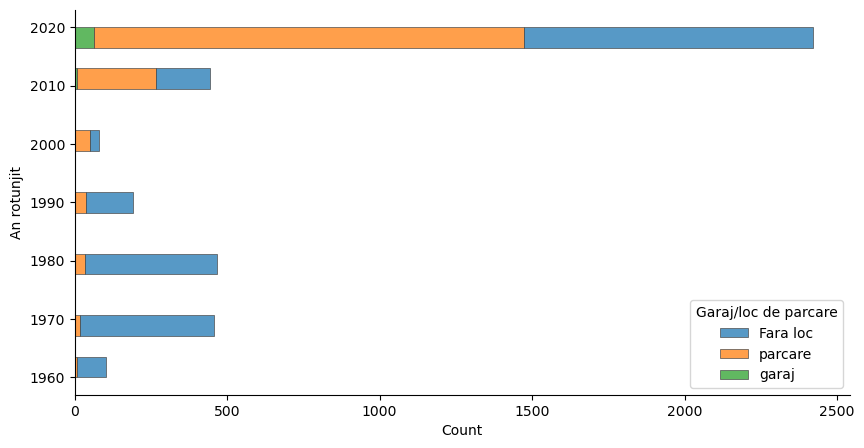

In [43]:
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)
sns.histplot(new_vanzare_df,
             y='An rotunjit',
             hue="Garaj/loc de parcare", 
             multiple="stack",
             edgecolor=".3",
             linewidth=.5)

<Axes: xlabel='Count', ylabel='An rotunjit'>

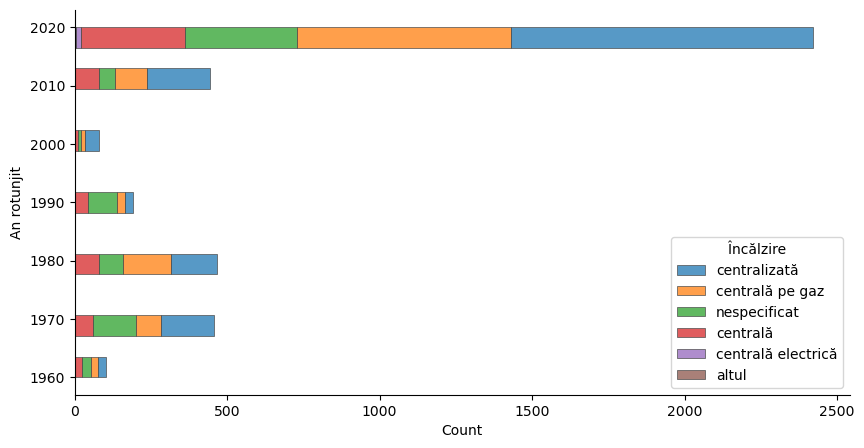

In [44]:
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)
sns.histplot(new_vanzare_df,
             y='An rotunjit',
             hue="Încălzire", 
             multiple="stack",
             edgecolor=".3",
             linewidth=.5)

[(10.0, 220.0), (4634.0, 320000.0)]

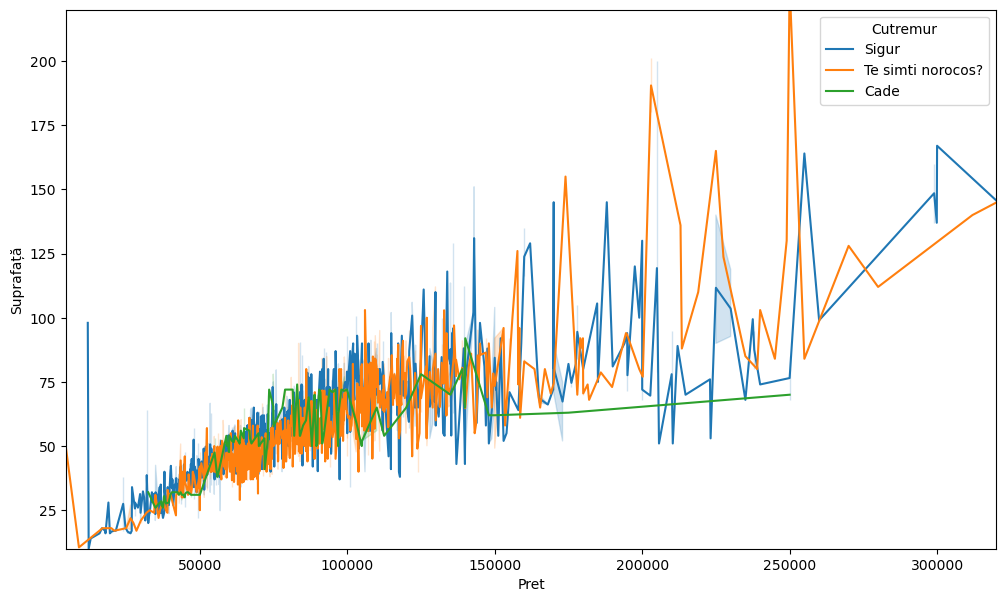

In [45]:
f, ax = plt.subplots(figsize=(12,7))
g = sns.lineplot(x="Pret",
                 y="Suprafață",
                 hue="Cutremur",
                 data=new_vanzare_df,
                 ax=ax)
g.set(ylim=(new_vanzare_df['Suprafață'].min(), 220),
              xlim=(new_vanzare_df['Pret'].min(),320000))

[(10.0, 220.0), (4634.0, 320000.0)]

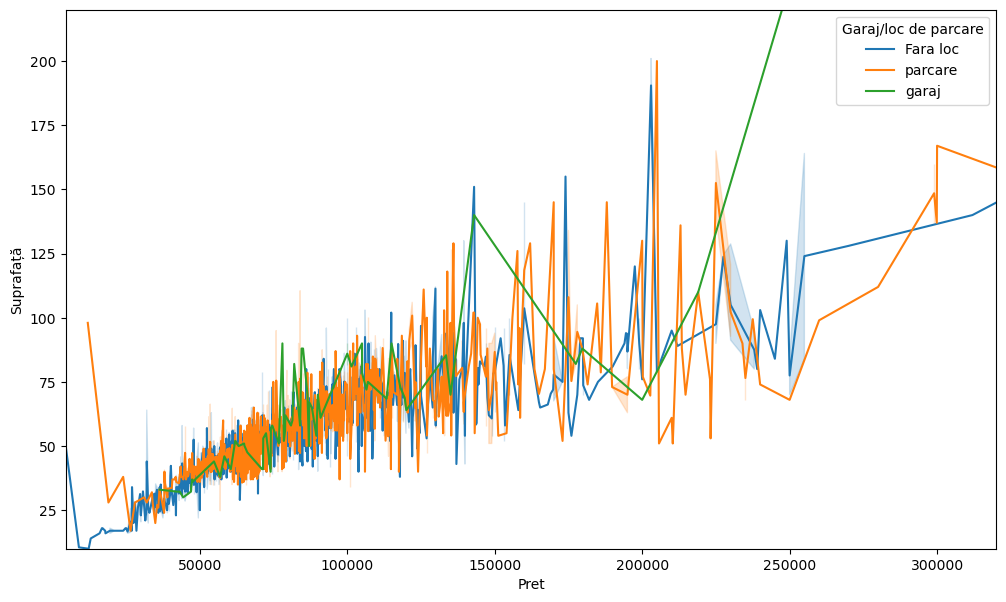

In [46]:
f, ax = plt.subplots(figsize=(12,7))
g = sns.lineplot(x="Pret",
                 y="Suprafață",
                 hue="Garaj/loc de parcare", 
                 data=new_vanzare_df,
                 ax=ax
            )
g.set(ylim=(new_vanzare_df['Suprafață'].min(), 220),
              xlim=(new_vanzare_df['Pret'].min(),320000)
     ,)

[(10.0, 220.0), (4634.0, 320000.0)]

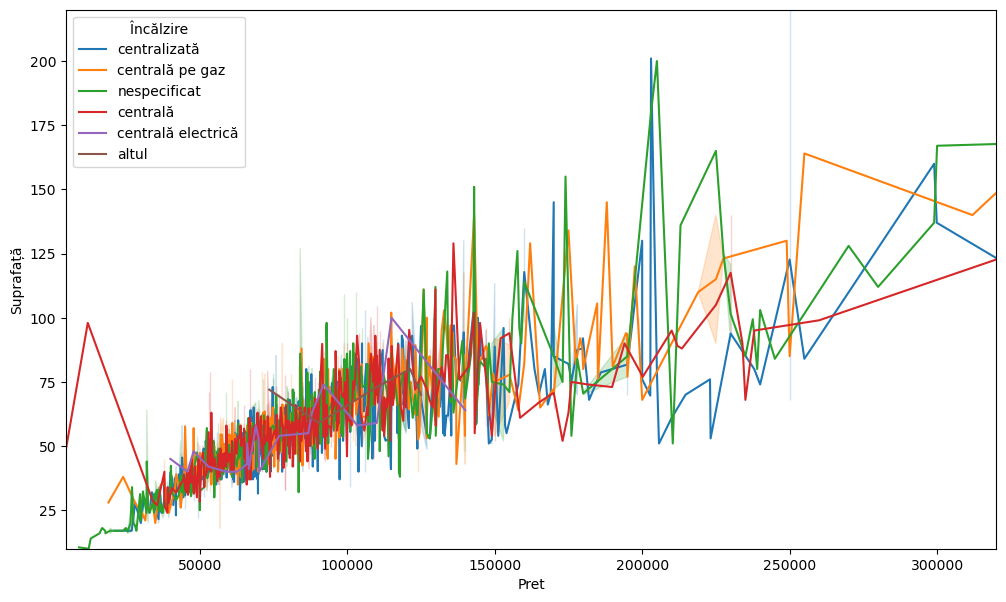

In [47]:
f, ax = plt.subplots(figsize=(12,7))
g = sns.lineplot(x="Pret",
                 y="Suprafață",
                 hue="Încălzire", 
                 data=new_vanzare_df,
                 ax=ax
            )
g.set(ylim=(new_vanzare_df['Suprafață'].min(), 220),
              xlim=(new_vanzare_df['Pret'].min(),320000)
     ,)